# Crank Nicholson scheme
We want to solve the parabolic PDE 
$$u_t = {\alpha}u_{xx} $$
using the Crank Nicholson Technique
$${\frac  {u_{{i}}^{{n+1}}-u_{{i}}^{{n}}}{\Delta t}}={\frac  {\alpha}{2(\Delta x)^{2}}}\left((u_{{i+1}}^{{n+1}}-2u_{{i}}^{{n+1}}+u_{{i-1}}^{{n+1}})+(u_{{i+1}}^{{n}}-2u_{{i}}^{{n}}+u_{{i-1}}^{{n}})\right)$$

and letting
${\displaystyle r={\frac {\alpha\Delta t}{2(\Delta x)^{2}}}}$

And this ultimately results to a finite difference equation given below 
$$-ru_{{i+1}}^{{n+1}}+(1+2r)u_{{i}}^{{n+1}}-ru_{{i-1}}^{{n+1}}=ru_{{i+1}}^{{n}}+(1-2r)u_{{i}}^{{n}}+ru_{{i-1}}^{{n}}\ $$


In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 15]

In [13]:
def a(r):
    return -1*r 
def b(r):
    return (1 + 2*r)
def c(r):
    return -1*r

def ThomasAlgorithm(a, b, c, d, n):
    c_dash = np.zeros(n-1)
    d_dash = np.zeros(n-1)
    c_dash[0] = c[0] / b[0]
    d_dash[0] = d[0] / b[0]
    for itr in range(1, n-1):
        c_dash[itr] = c[itr] / (b[itr] - a[itr] * c_dash[itr-1])
        d_dash[itr] = (d[itr] - a[itr]*d_dash[itr-1]) / (b[itr] - a[itr] * c_dash[itr-1])
    
    y = np.zeros(n-1)
    y[n-2] = d_dash[n-2]
    
    for itr in reversed(range(n-2)):
        y[itr] = d_dash[itr] - c_dash[itr] * y[itr+1]
    
    return y

In [14]:
def Solver(r, y_prev, step, y_x0, y_xn):
  A = np.array([a(r) for i in range(int(step - 1))])
  B = np.array([b(r) for i in range(int(step - 1))])
  C = np.array([c(r) for i in range(int(step - 1))])
  D = np.array([r*(y_prev[i+1] + y_prev[i-1]) + (1-2*r)*y_prev[i] for i in range(1, int(step))])
  y = ThomasAlgorithm(A, B, C, D, int(step))
  y = np.append(y, y_xn)
  y = np.insert(y, 0, y_x0)
  return y

Here  $ \alpha = 1$

In [18]:
x0 = 0 
xn = 1
t0 = 0
tn = 1
y_x0 = 0
y_xn = 0 
delta_x = 0.25
r = 1/6
delta_t = 2 * r * delta_x**2 
step = np.ceil((xn - x0)/delta_x)
time_step = np.ceil((tn - t0)/delta_t)
def f(x0, xn, delta_x, i):
  temp = x0 + delta_x*i
  return temp

In [19]:
count = 0
y_init = np.array([np.sin(np.pi*(f(x0, xn, delta_x, i))) for i in range(int(step+1))])
y = y_init
# print("Initial Solution Iteration")
Solution = np.array([[]])
Solution = np.append(Solution, np.reshape(y, (1, y.shape[0])), axis = 1)
# print(Solution)
while(count < time_step):
  temp = Solver(r, y, step, y_x0, y_xn)
  count = count + 1
  Solution = np.append(Solution, np.reshape(temp, (1, temp.shape[0])), axis=0)
  y = temp
#   print(Solution[count])
# print(Solution.shape)

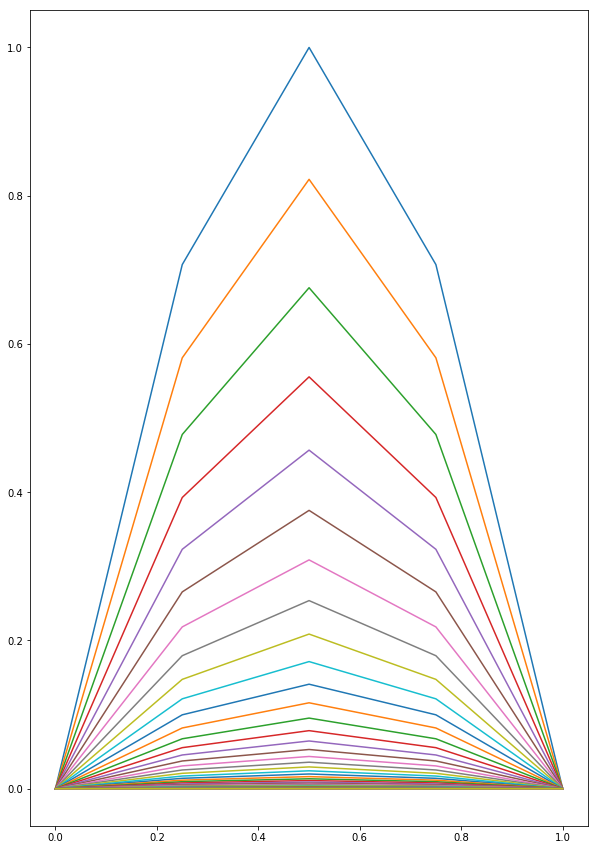

<Figure size 720x1080 with 0 Axes>

In [20]:
def func(x0, xn, delta_x, step):
  temp = np.array([f(x0, xn, delta_x, i) for i in range(int(step + 1))])
  return temp
x = func(x0, xn, delta_x, step)
for i in range(Solution.shape[0]):
  plt.plot(x, Solution[i])
plt.show()
plt.savefig("Plot.png")
